## Read Undersampled_data:

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from zipfile import ZipFile
import nbimporter
import random_forest_method
import performance_measure
import svm_method
import data_sampling
import split_data_set

In [35]:
path = "../../../undersampled_data.zip"

zip_file = ZipFile(path)
undersampled_data = pd.read_csv(zip_file.open('undersampled_data.csv')) #, nrows=500000)
#data = pd.read_csv(path, compression='zip', sep=',')#, nrows=500000)

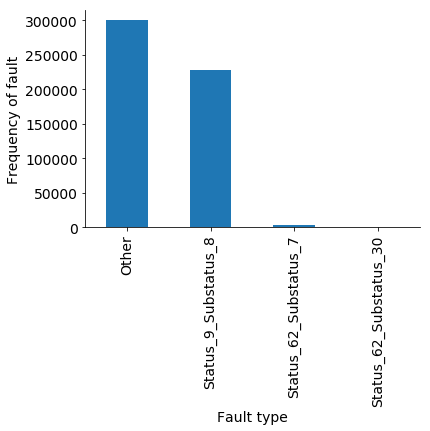

<Figure size 1440x1152 with 0 Axes>

In [36]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [37]:
print(undersampled_data['Status'].value_counts())

Other                     300000
Status_9_Substatus_8      228668
Status_62_Substatus_7       4098
Status_62_Substatus_30       383
Name: Status, dtype: int64


## Do more undersampling

In [38]:
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Other")
undersampled_data = data_sampling.undersample_dataset(undersampled_data,20000,"Status_9_Substatus_8")

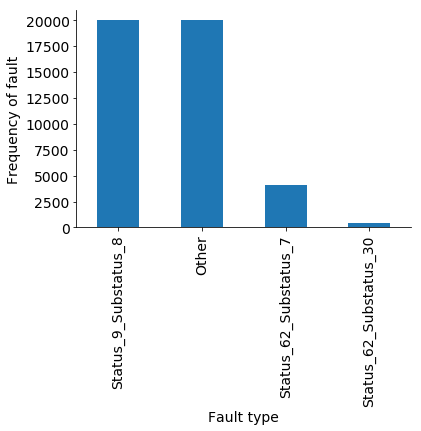

<Figure size 1440x1152 with 0 Axes>

In [39]:
data_sampling.plot_balance(undersampled_data, 'Status')

In [40]:
X = undersampled_data.drop(columns = ['Status', 'TimeStamp'])
y = undersampled_data.Status
y.shape

(44481,)

In [41]:
y.value_counts()

Status_9_Substatus_8      20000
Other                     20000
Status_62_Substatus_7      4098
Status_62_Substatus_30      383
Name: Status, dtype: int64

### Split into training and test

In [42]:
X_train, X_test, y_train, y_test = split_data_set.split_data(X,y)

In [43]:
y_train.value_counts()

Status_9_Substatus_8      13400
Other                     13400
Status_62_Substatus_7      2746
Status_62_Substatus_30      256
Name: Status, dtype: int64

In [44]:
y_test.value_counts()

Status_9_Substatus_8      6600
Other                     6600
Status_62_Substatus_7     1352
Status_62_Substatus_30     127
Name: Status, dtype: int64

## Random forest and feature importance

Normalized confusion matrix
[[9.83939394e-01 3.03030303e-04 3.93939394e-03 1.18181818e-02]
 [1.10236220e-01 8.89763780e-01 0.00000000e+00 0.00000000e+00]
 [4.43786982e-03 0.00000000e+00 9.95562130e-01 0.00000000e+00]
 [1.39393939e-02 0.00000000e+00 0.00000000e+00 9.86060606e-01]]


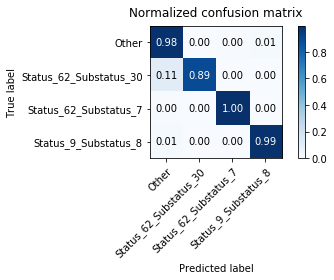

Total Accuracy 		0.985

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.983 		 0.984 		 0.983
Status_62_Substatus_30    	 0.983 		 0.890 		 0.934
Status_62_Substatus_7     	 0.981 		 0.996 		 0.988
Status_9_Substatus_8      	 0.988 		 0.986 		 0.987


In [45]:
rf = random_forest_method.get_rf_model(X_train, X_test, y_train, y_test)

In [46]:
rf

,importance
ActivePower,0.150798
Log-T-Raw-Rectifier1HeatSink,0.101509
Log-T-Raw-TransformerTemperature,0.082256
Log-T-Raw-Rotor2Temperature,0.054563
Log-T-Raw-Stator2Temperature,0.048185
Log-T-Raw-Stator1Temperature,0.043453
Log-T-Raw-Rotor1Temperature,0.042383
Log-T-Raw-NacelleAmbientTemperature,0.036720
Log-T-Raw-Rectifier2HeatSink,0.033166
Spinner-Temperature,0.029999


# Preprocessing

### Scale dataset

In [47]:
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing

scaler  = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
print(X_train_scaled.shape)
print(X_test_scaled.shape)

(29802, 34)
(14679, 34)


### SVM method

### BALANCED SVM

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.39272727 0.33075758 0.13893939 0.13757576]
 [0.23622047 0.62992126 0.07874016 0.05511811]
 [0.02440828 0.05325444 0.86760355 0.05473373]
 [0.11378788 0.24030303 0.01439394 0.63151515]]


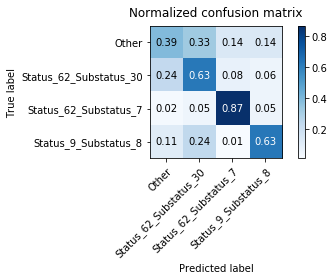

Plotting Performance Measure...
Total Accuracy 		0.546

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.761 		 0.393 		 0.518
Status_62_Substatus_30    	 0.020 		 0.630 		 0.040
Status_62_Substatus_7     	 0.534 		 0.868 		 0.661
Status_9_Substatus_8      	 0.808 		 0.632 		 0.709


In [48]:
# Balanced
svm1 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)

### UNBALANCED SVM

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[8.47424242e-01 0.00000000e+00 1.07575758e-02 1.41818182e-01]
 [8.81889764e-01 0.00000000e+00 0.00000000e+00 1.18110236e-01]
 [4.86686391e-01 0.00000000e+00 4.57840237e-01 5.54733728e-02]
 [3.27272727e-01 0.00000000e+00 1.51515152e-04 6.72575758e-01]]


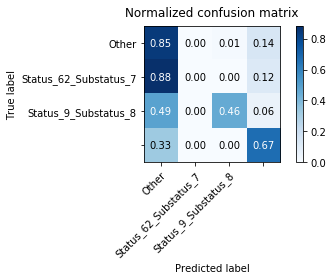

Plotting Performance Measure...
Total Accuracy 		0.726

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.656 		 0.847 		 0.740
Status_62_Substatus_7     	 0.896 		 0.458 		 0.606
Status_9_Substatus_8      	 0.812 		 0.673 		 0.736


In [49]:
# Unbalanced
svm2 = svm_method.get_svm_model(X_train_scaled, X_test_scaled, y_train, y_test)

### SMOTE (Synthetic Minority Oversampling Technique)

In [50]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=12)
X_train_scaled_smote ,y_train_smote = sm.fit_resample(X_train_scaled, y_train)


X_test_scaled_smote ,y_test_smote = sm.fit_resample(X_test_scaled, y_test)

In [51]:
y1 = pd.DataFrame(X_train_scaled_smote)
y1[0].value_counts()

0.470388    330
0.503825    318
0.493908    288
0.491357    271
0.491641    253
           ... 
0.489840      1
0.490860      1
0.485971      1
0.495760      1
0.000000      1
Name: 0, Length: 20194, dtype: int64

## SMOTE and unbalanced weights (USE THIS RESULT Best results for 62_30)!

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.45212121 0.33015152 0.12166667 0.09606061]
 [0.2519697  0.66924242 0.05409091 0.02469697]
 [0.02439394 0.00212121 0.91681818 0.05666667]
 [0.11848485 0.24621212 0.01378788 0.62151515]]


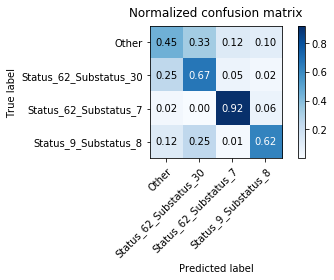

Plotting Performance Measure...
Total Accuracy 		0.665

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.534 		 0.452 		 0.490
Status_62_Substatus_30    	 0.536 		 0.669 		 0.595
Status_62_Substatus_7     	 0.829 		 0.917 		 0.871
Status_9_Substatus_8      	 0.778 		 0.622 		 0.691


In [52]:
svm3 = svm_method.get_svm_model(X_train_scaled_smote, X_test_scaled_smote, y_train_smote, y_test_smote)

## SMOTE and class_weight balanced

Loading...
Training...
Training Complete
Plotting Confusion Matrix...
Normalized confusion matrix
[[0.39272727 0.33075758 0.13893939 0.13757576]
 [0.23622047 0.62992126 0.07874016 0.05511811]
 [0.02440828 0.05325444 0.86760355 0.05473373]
 [0.11378788 0.24030303 0.01439394 0.63151515]]


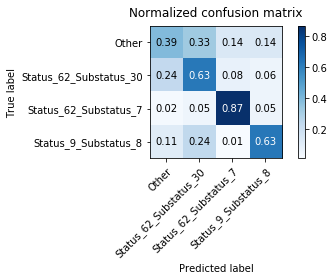

Plotting Performance Measure...
Total Accuracy 		0.546

Status 				 Precision 	 Recall 	 F1
----------------------------------------------------------------------
Other                     	 0.761 		 0.393 		 0.518
Status_62_Substatus_30    	 0.020 		 0.630 		 0.040
Status_62_Substatus_7     	 0.534 		 0.868 		 0.661
Status_9_Substatus_8      	 0.808 		 0.632 		 0.709


In [53]:
# balanced with smote and undersampling
svm4 = svm_method.get_svm_model_balanced(X_train_scaled, X_test_scaled, y_train, y_test)